## Illustration
A small example is proposed here. We assume that 5 municipalities are linked to 5 reservoirs and that each of the municipality also have the opportunity to get water from the aquifer. The code is centred in main.R, where the input files are called. It is also possible to decide at that point wether to use lpSolve or Gurobi as a solver.

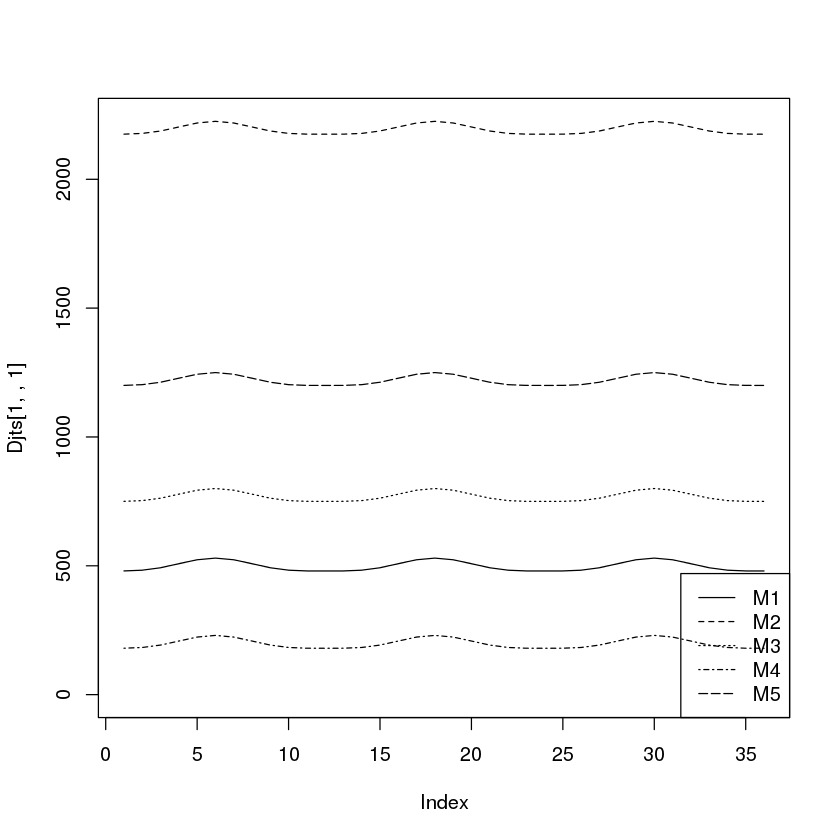

In [5]:
source("input_fivecounties.R")

In [6]:
source("generate_matrix_gw.R")

In [9]:
solver <- "lpsolve"
source("solving.R")

[1] "solving done by lpSolve"
[1] "Total cost of water allocation solution is : 644654.36$"


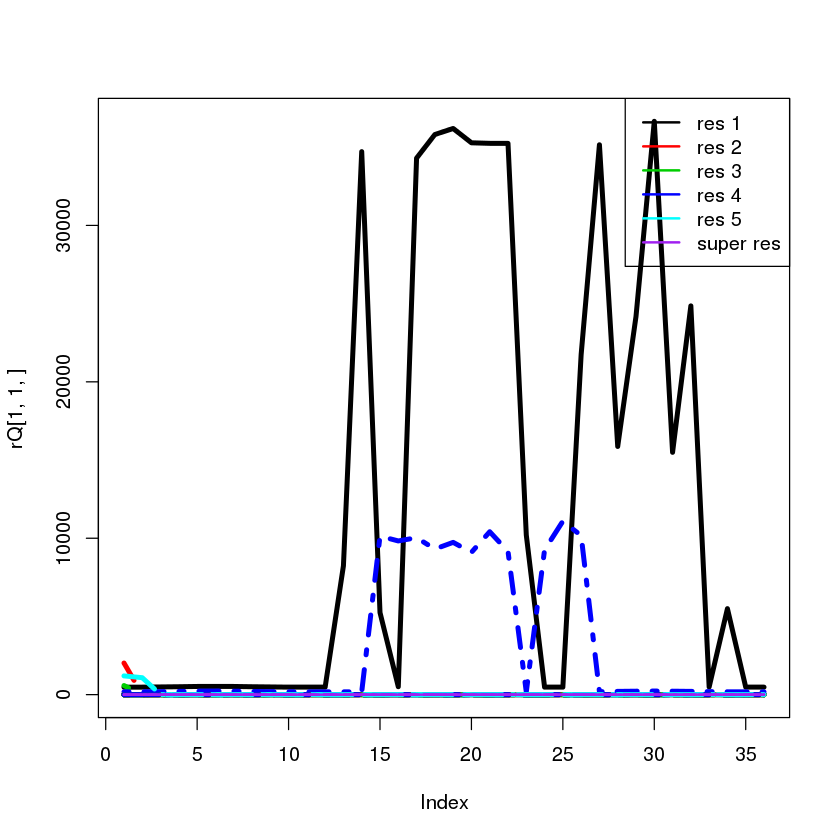

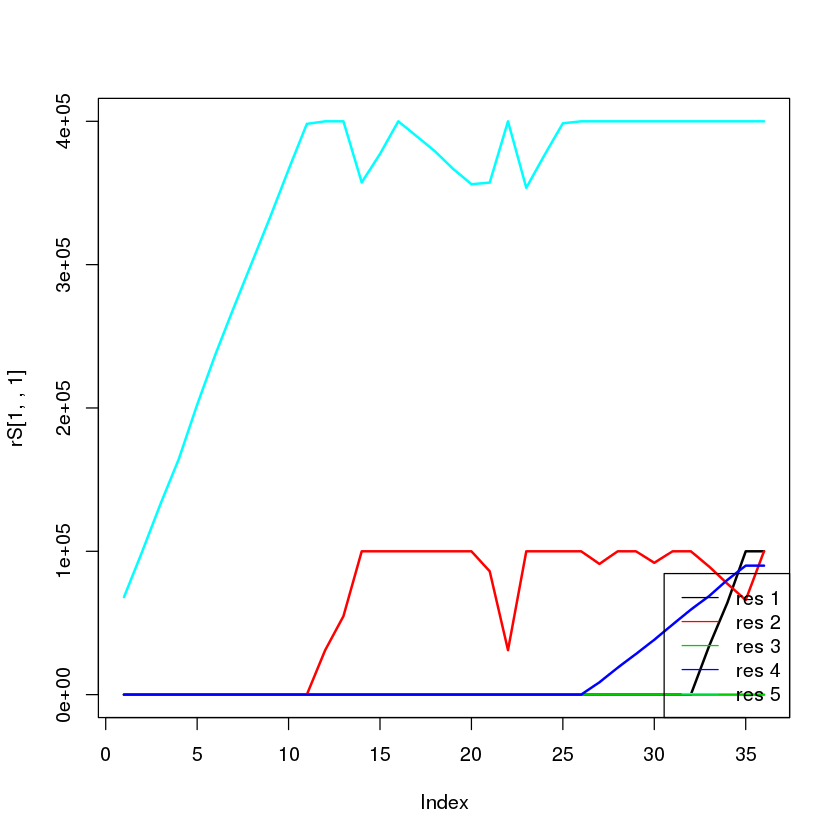

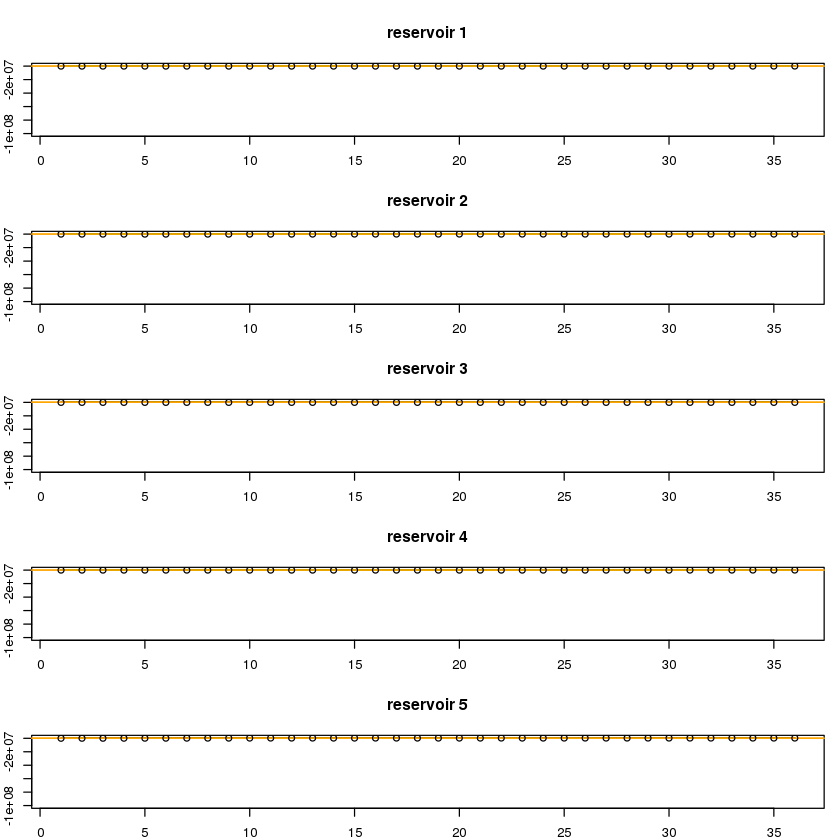

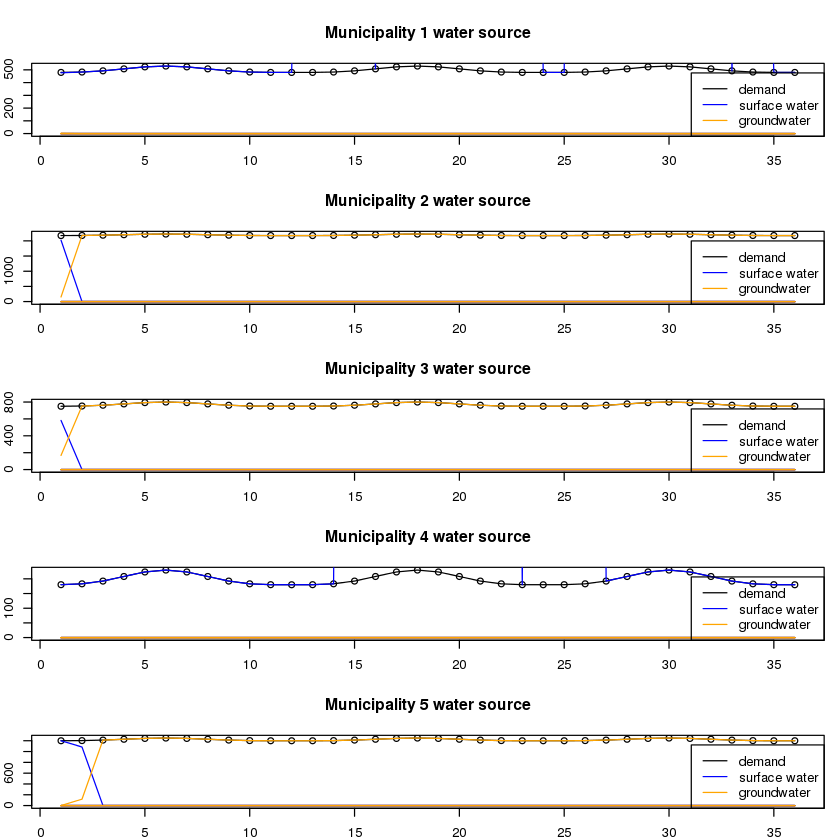

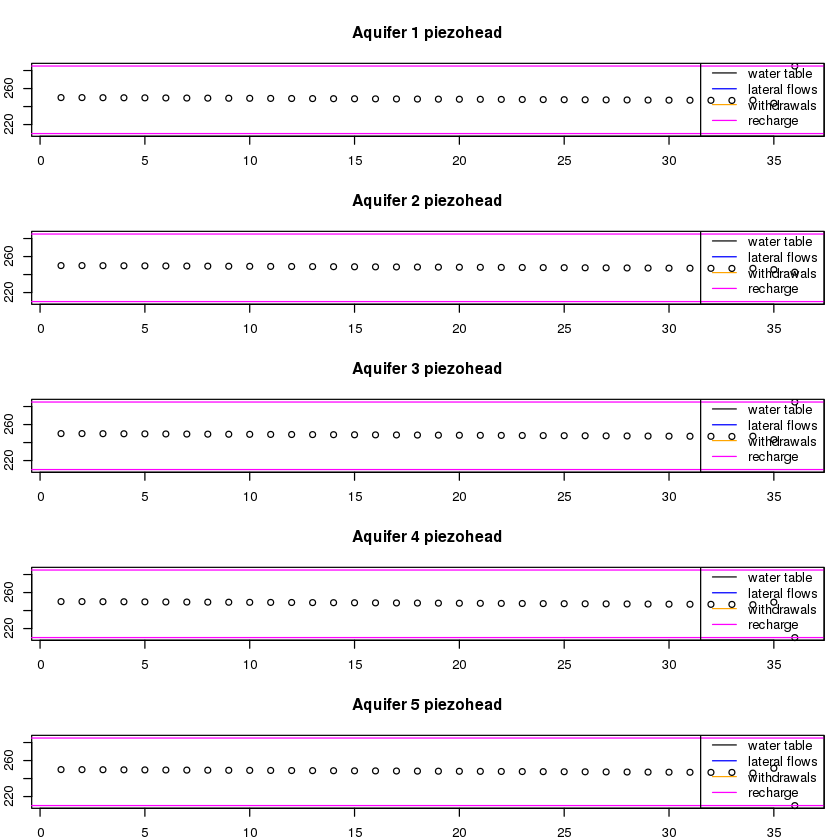

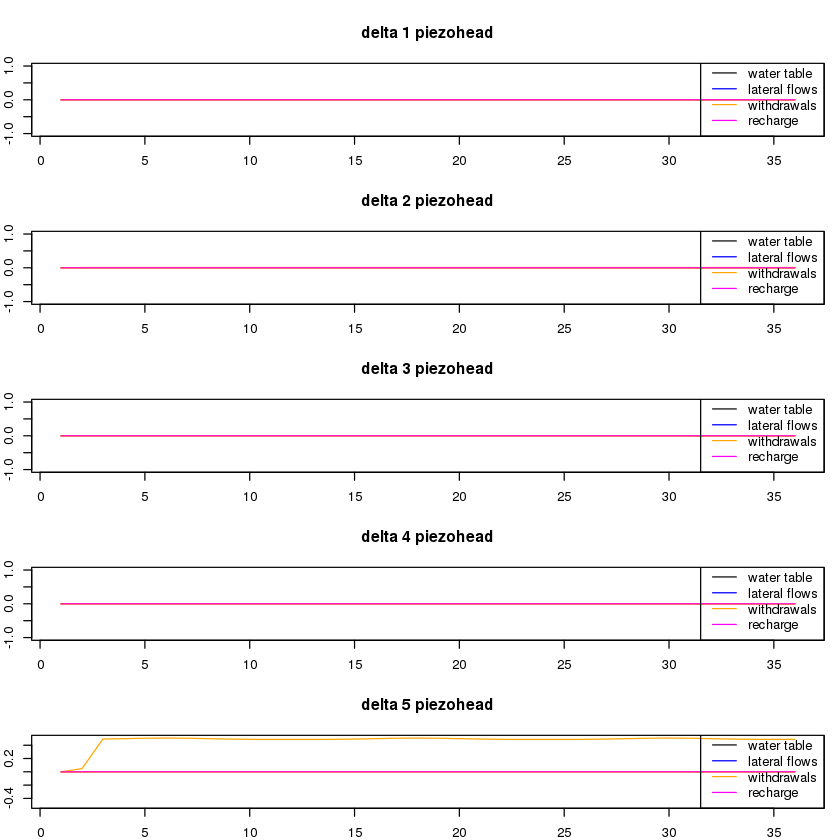

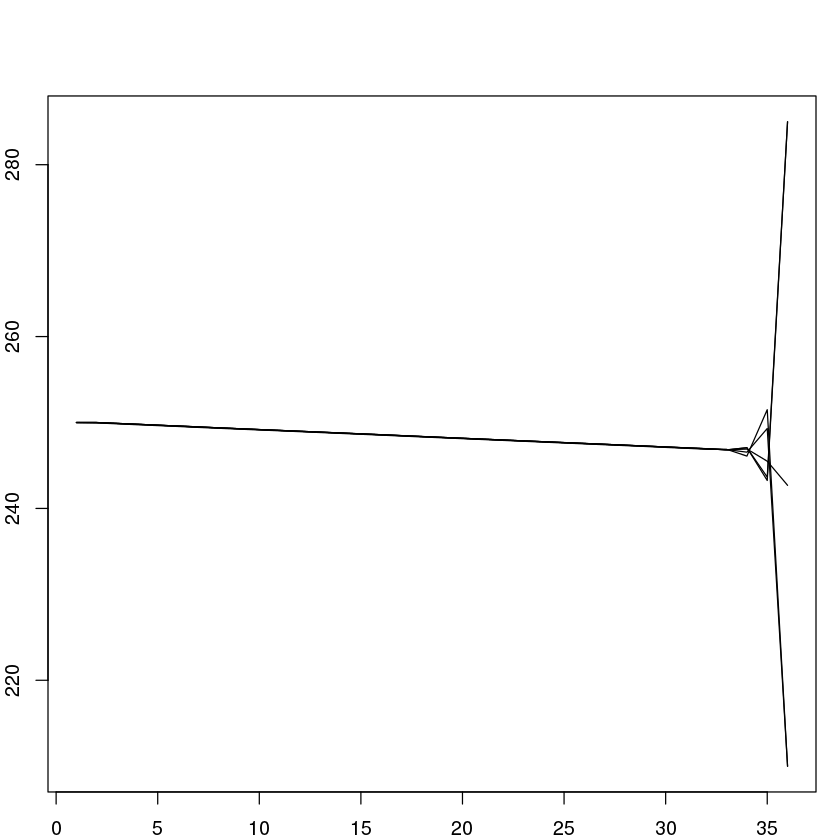

In [8]:
source("plot_results.R")